# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [115]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [117]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [118]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [119]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [120]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [121]:
#check null values
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [122]:
#check duplicated values
df.duplicated().sum()

719

In [123]:
#remove duplicates
df.drop_duplicates(inplace=True)

In [124]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [125]:
df.sales_channel.unique()

array(['Internet', 'Mobile'], dtype=object)

In [126]:
mapping1 = {
    "Internet": 1,
    "Mobile": 2,
}

df["sales_channel"] = df["sales_channel"].map(mapping1)

In [127]:
df.sales_channel.unique()

array([1, 2], dtype=int64)

In [128]:
df.trip_type.unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [129]:
mapping2 = {
    "RoundTrip": 1,
    "CircleTrip": 2,
    "OneWay":3,
    }

df["trip_type"] = df["trip_type"].map(mapping2)

In [130]:
df.trip_type.unique()

array([1, 2, 3], dtype=int64)

In [131]:
#drop columns not deemed necessary
df.drop(['route','booking_origin'],axis=1,inplace=True)


Text(0, 0.5, 'Count')

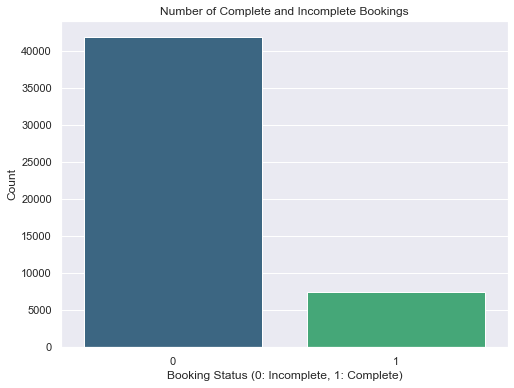

In [132]:
#plot number of incomplete and complete bookings
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='booking_complete', data=df, palette='viridis')
plt.title('Number of Complete and Incomplete Bookings')
plt.xlabel('Booking Status (0: Incomplete, 1: Complete)')
plt.ylabel('Count')

In [133]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,1,262,19,7,6,1,0,0,5.52,0
1,1,1,1,112,20,3,6,0,0,0,5.52,0
2,2,1,1,243,22,17,3,1,1,0,5.52,0
3,1,1,1,96,31,4,6,0,0,1,5.52,0
4,2,1,1,68,22,15,3,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,1,1,27,6,9,6,1,0,1,5.62,0
49996,1,1,1,111,6,4,7,0,0,0,5.62,0
49997,1,1,1,24,6,22,6,0,0,1,5.62,0
49998,1,1,1,15,6,11,1,1,0,1,5.62,0


In [134]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [141]:
#Split the data
X = df.drop(['booking_complete'],axis=1)
y = df.iloc[:,-1]


In [142]:
X

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,1,1,262,19,7,6,1,0,0,5.52
1,1,1,1,112,20,3,6,0,0,0,5.52
2,2,1,1,243,22,17,3,1,1,0,5.52
3,1,1,1,96,31,4,6,0,0,1,5.52
4,2,1,1,68,22,15,3,1,0,1,5.52
...,...,...,...,...,...,...,...,...,...,...,...
49995,2,1,1,27,6,9,6,1,0,1,5.62
49996,1,1,1,111,6,4,7,0,0,0,5.62
49997,1,1,1,24,6,22,6,0,0,1,5.62
49998,1,1,1,15,6,11,1,1,0,1,5.62


In [156]:
y_test.unique()

array([0, 1], dtype=int64)

In [183]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, random_state= 50)

In [165]:
#impot random forest classifier and set hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion = 'gini',
                            max_depth = 8,
                            min_samples_split = 100,
                            random_state = 5)
class_weights = {0: 1, 1: 10}

In [166]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_split=100, random_state=5)

In [167]:
clf.feature_importances_

array([0.03036012, 0.03376134, 0.00687179, 0.10521105, 0.26043048,
       0.0551318 , 0.02507644, 0.10233566, 0.04313087, 0.02888799,
       0.30880248])

Feature ranking:
flight_duration: 0.3088024756866093
length_of_stay: 0.26043047557534177
purchase_lead: 0.10521105379815068
wants_extra_baggage: 0.1023356566060416
flight_hour: 0.055131798053800966
wants_preferred_seat: 0.043130865483045004
sales_channel: 0.033761335334308584
num_passengers: 0.030360117050392144
wants_in_flight_meals: 0.028887989867686818
flight_day: 0.02507644120076451
trip_type: 0.0068717913438586156


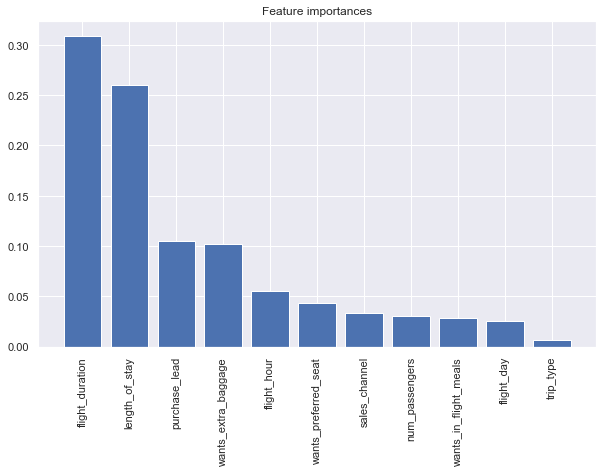

In [168]:
# Access feature importances
importances = clf.feature_importances_

# Get the indices of features sorted by importance
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(len(indices)):
    print(f"{X_train.columns[indices[f]]}: {importances[indices[f]]}")

# Plot the feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()

In [169]:
y_pred = clf.predict(X_test)

In [170]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[10503,     0],
       [ 1818,     0]], dtype=int64)

In [171]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8524470416362309

In [172]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,X_train, y_train, cv=10)

array([0.84929654, 0.84929654, 0.84929654, 0.84929654, 0.84929654,
       0.84929654, 0.84929654, 0.84902597, 0.84902597, 0.84902597])

In [173]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92     12321
           1       0.00      0.00      0.00         0

    accuracy                           0.85     12321
   macro avg       0.50      0.43      0.46     12321
weighted avg       1.00      0.85      0.92     12321



c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [184]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming you have X and y as your features and target variable
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Fit and transform the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create and train RandomForestClassifier on the resampled data
clf = RandomForestClassifier(
                            random_state = 5)
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      8378
           1       0.23      0.20      0.21      1479

    accuracy                           0.78      9857
   macro avg       0.55      0.54      0.54      9857
weighted avg       0.77      0.78      0.77      9857



In [182]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[7405,  973],
       [1187,  292]], dtype=int64)

In [185]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,X_train, y_train, cv=10)

array([0.84478823, 0.84580269, 0.84630992, 0.84352016, 0.84627093,
       0.84576357, 0.84322679, 0.84145104, 0.8442415 , 0.84677829])

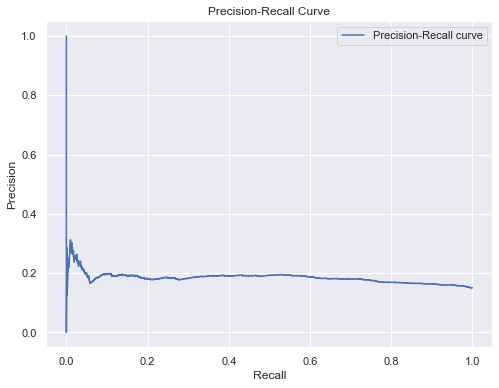

Optimal Threshold: 0.3460874478960001
              precision    recall  f1-score   support

           0       0.90      0.43      0.58      8378
           1       0.18      0.72      0.29      1479

    accuracy                           0.47      9857
   macro avg       0.54      0.57      0.43      9857
weighted avg       0.79      0.47      0.54      9857



In [179]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (class 1)
y_probs = clf.predict_proba(X_test)[:, 1]

# Generate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Find the optimal threshold based on the curve (e.g., maximizing F1-score)
optimal_threshold_index = np.argmax(2 * precision * recall / (precision + recall + 1e-10))
optimal_threshold = thresholds[optimal_threshold_index]

print("Optimal Threshold:", optimal_threshold)

# Use the optimal threshold to make predictions
y_pred_adjusted = (y_probs >= optimal_threshold).astype(int)

# Evaluate the model with the adjusted threshold
print(classification_report(y_test, y_pred_adjusted))

Results are in modelling presentation